In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
import seaborn as sns


In [2]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-white.csv',delimiter=';')

In [3]:
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [4]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [5]:
lreg=LinearRegression()
y_pred=cross_val_predict(lreg,X,y,cv=10)

In [6]:
from sklearn.metrics import r2_score
r2_value=r2_score(y,y_pred)
adj_r2=1-((1-r2_value)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
a_r2=make_scorer(adj_r2)

In [7]:
adj_r2

0.26410262112483174

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

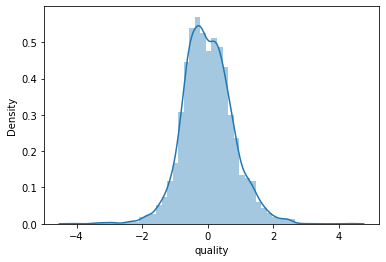

In [8]:
sns.distplot(y-y_pred)